In [1]:
!ptplotlibip install --upgrade numpy ma

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


🎯 KẾT QUẢ ĐÁNH GIÁ:
Độ chính xác (Accuracy): 1.0
Độ nhạy (Sensitivity): 1.0
Độ đặc hiệu (Specificity): 1.0


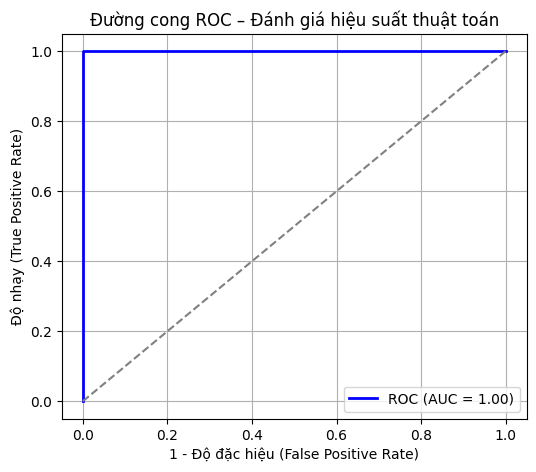

In [9]:
!pip install imagehash Pillow scikit-learn matplotlib requests --quiet

import imagehash
from PIL import Image
from io import BytesIO
import requests
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt

# HÀM TÍNH HASH TỪ LINK ẢNH TRỰC TIẾP
def get_hash_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return imagehash.average_hash(img)

def hamming_distance(h1, h2):
    return h1 - h2

# 3 ẢNH GIỐNG NHƯ CÂU 4
img1_url = "https://raw.githubusercontent.com/trieuhoang1212/Labs_ComputerVision/main/Lab3/assets/images/anh_mau2.jpg"
img2_url = "https://raw.githubusercontent.com/trieuhoang1212/Labs_ComputerVision/main/Lab3/assets/images/anh_mau2.jpg"  # tương tự
img3_url = "https://raw.githubusercontent.com/trieuhoang1212/Labs_ComputerVision/main/Lab3/assets/images/anh_mau1.jpg"  # khác loại

# TẠO CẶP DỮ LIỆU (1 CẶP TƯƠNG TỰ, 1 CẶP KHÁC LOẠI)
pairs = [
    (img1_url, img2_url, 1),  # tương tự
    (img1_url, img3_url, 0)   # khác loại
]

# TÍNH similarity (độ tương đồng) và nhãn thật (label)
y_true, y_score = [], []
for a, b, label in pairs:
    h1 = get_hash_from_url(a)
    h2 = get_hash_from_url(b)
    dist = hamming_distance(h1, h2)
    sim = 1 - dist / 64.0   # chuyển khoảng cách Hamming thành độ tương đồng [0,1]
    y_true.append(label)
    y_score.append(sim)

# PHÂN LOẠI ẢNH DỰA THEO NGƯỠNG
threshold = 0.85
y_pred = [1 if s >= threshold else 0 for s in y_score]

 # TÍNH CÁC CHỈ SỐ ĐÁNH GIÁ
accuracy = accuracy_score(y_true, y_pred)
sensitivity = recall_score(y_true, y_pred)  # Độ nhạy
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn + fp)

print("🎯 KẾT QUẢ ĐÁNH GIÁ:")
print("Độ chính xác (Accuracy):", round(accuracy, 3))
print("Độ nhạy (Sensitivity):", round(sensitivity, 3))
print("Độ đặc hiệu (Specificity):", round(specificity, 3))


# VẼ ĐƯỜNG CONG ROC

fpr, tpr, _ = roc_curve(y_true, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC (AUC = %.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlabel('1 - Độ đặc hiệu (False Positive Rate)')
plt.ylabel('Độ nhạy (True Positive Rate)')
plt.title('Đường cong ROC – Đánh giá hiệu suất thuật toán')
plt.legend()
plt.grid(True)
plt.show()
